In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from subprocess import check_output
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [2]:
df = pd.read_excel('avastin_drug_last.xlsx')
df

,Report Number,Age,Gender,Other Medically Important Conditions,Weight,Height,Drugs,Adverse Reaction Terms,MedDRA System Organ Class (SOC)
0,E2B_00679913,62,Male,1.0,99.0,NaN,PANTOPRAZOLE,Mobility decreased,Musculoskeletal and connective tissue disorders
1,E2B_00679913,62,Male,1.0,99.0,NaN,TELMISARTAN,Mobility decreased,Musculoskeletal and connective tissue disorders
2,E2B_00679913,62,Male,1.0,99.0,NaN,SERTRALINE,Mobility decreased,Musculoskeletal and connective tissue disorders
3,E2B_00679913,62,Male,1.0,99.0,NaN,AVASTIN,Mobility decreased,Musculoskeletal and connective tissue disorders
4,E2B_00679913,62,Male,1.0,99.0,NaN,DEXAMETHASONE,Mobility decreased,Musculoskeletal and connective tissue disorders
...,...,...,...,...,...,...,...,...,...
81749,466525,57,NaN,1.0,NaN,NaN,AVASTIN,Disease progression,General disorders and administration site cond...
81750,350585,50,Female,1.0,NaN,NaN,SENOKOT,Intestinal perforation,Gastrointestinal disorders
81751,350585,50,Female,1.0,NaN,NaN,OXYCODONE,Intestinal perforation,Gastrointestinal disorders
81752,350585,50,Female,1.0,NaN,NaN,OXYCODONE,Intestinal perforation,Gastrointestinal disorders


In [3]:
df = df.drop('Weight', axis = 1)
df = df.drop('Height', axis = 1)

In [4]:
df

,Report Number,Age,Gender,Other Medically Important Conditions,Drugs,Adverse Reaction Terms,MedDRA System Organ Class (SOC)
0,E2B_00679913,62,Male,1.0,PANTOPRAZOLE,Mobility decreased,Musculoskeletal and connective tissue disorders
1,E2B_00679913,62,Male,1.0,TELMISARTAN,Mobility decreased,Musculoskeletal and connective tissue disorders
2,E2B_00679913,62,Male,1.0,SERTRALINE,Mobility decreased,Musculoskeletal and connective tissue disorders
3,E2B_00679913,62,Male,1.0,AVASTIN,Mobility decreased,Musculoskeletal and connective tissue disorders
4,E2B_00679913,62,Male,1.0,DEXAMETHASONE,Mobility decreased,Musculoskeletal and connective tissue disorders
...,...,...,...,...,...,...,...
81749,466525,57,NaN,1.0,AVASTIN,Disease progression,General disorders and administration site cond...
81750,350585,50,Female,1.0,SENOKOT,Intestinal perforation,Gastrointestinal disorders
81751,350585,50,Female,1.0,OXYCODONE,Intestinal perforation,Gastrointestinal disorders
81752,350585,50,Female,1.0,OXYCODONE,Intestinal perforation,Gastrointestinal disorders


In [5]:
df1 = df[['Report Number', 'Drugs']]
df1

,Report Number,Drugs
0,E2B_00679913,PANTOPRAZOLE
1,E2B_00679913,TELMISARTAN
2,E2B_00679913,SERTRALINE
3,E2B_00679913,AVASTIN
4,E2B_00679913,DEXAMETHASONE
...,...,...
81749,466525,AVASTIN
81750,350585,SENOKOT
81751,350585,OXYCODONE
81752,350585,OXYCODONE


In [6]:
df1 = df1.drop_duplicates()
df1

,Report Number,Drugs
0,E2B_00679913,PANTOPRAZOLE
1,E2B_00679913,TELMISARTAN
2,E2B_00679913,SERTRALINE
3,E2B_00679913,AVASTIN
4,E2B_00679913,DEXAMETHASONE
...,...,...
81746,484833,AVASTIN
81748,466525,AVASTIN
81750,350585,SENOKOT
81751,350585,OXYCODONE


In [7]:
df1 = pd.get_dummies(df1, columns = ['Drugs'])

In [8]:
df1 = df1.reset_index()

In [9]:
df1 = df1.groupby(by=['Report Number']).sum()

In [10]:
df1 = df1.reset_index()

In [11]:
df1

,Report Number,index,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,Drugs_ACCUTANE ROCHE,Drugs_ACEBUTOLOL,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
0,339065,160881,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,340764,230211,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,340767,363550,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,340959,301882,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,341121,143425,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,E2B_04094042,21615,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,E2B_04102972,32205,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,E2B_04128179,50809,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,E2B_04128366,27775,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df1 = df1.reset_index()

In [13]:
df1 = df1.drop('level_0', axis = 1)

In [14]:
df1 = df1.drop('index', axis = 1)

In [15]:
df1

,Report Number,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,Drugs_ACCUTANE ROCHE,Drugs_ACEBUTOLOL,Drugs_ACEBUTOLOL HYDROCHLORIDE,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
0,339065,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,340764,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,340767,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,340959,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,341121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,E2B_04094042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,E2B_04102972,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,E2B_04128179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,E2B_04128366,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df5 = df[['Report Number', 'Age', 'Gender', 'Other Medically Important Conditions']]

In [17]:
df5 = df5.drop_duplicates()

In [18]:
df5

,Report Number,Age,Gender,Other Medically Important Conditions
0,E2B_00679913,62,Male,1.0
40,E2B_00628664,64,Male,2.0
89,E2B_00767130,42,Female,1.0
121,E2B_01047813,54,Male,2.0
127,E2B_01053886,39,Male,1.0
...,...,...,...,...
81742,463823,46,NaN,NaN
81743,435472,62,Female,1.0
81746,484833,72,Male,NaN
81748,466525,57,NaN,1.0


In [19]:
df1 = df5.merge(df1, how='inner', on='Report Number')

In [20]:
df1

,Report Number,Age,Gender,Other Medically Important Conditions,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
0,E2B_00679913,62,Male,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,E2B_00628664,64,Male,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,E2B_00767130,42,Female,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E2B_01047813,54,Male,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,E2B_01053886,39,Male,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,463823,46,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,435472,62,Female,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,484833,72,Male,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,466525,57,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df1 = df1.set_index('Report Number')

In [22]:
df1

,Age,Gender,Other Medically Important Conditions,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,Drugs_ACCUTANE ROCHE,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
Report Number,,,,,,,,,,,,,,,,,,,,,
E2B_00679913,62,Male,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
E2B_00628664,64,Male,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_00767130,42,Female,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01047813,54,Male,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01053886,39,Male,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463823,46,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435472,62,Female,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484833,72,Male,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df1['Other Medically Important Conditions'] = df1['Other Medically Important Conditions'].fillna(df1['Other Medically Important Conditions'].mode()[0])

In [24]:
df1

,Age,Gender,Other Medically Important Conditions,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,Drugs_ACCUTANE ROCHE,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
Report Number,,,,,,,,,,,,,,,,,,,,,
E2B_00679913,62,Male,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
E2B_00628664,64,Male,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_00767130,42,Female,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01047813,54,Male,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01053886,39,Male,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463823,46,NaN,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435472,62,Female,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484833,72,Male,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df2 = df[['Report Number', 'Adverse Reaction Terms']].drop_duplicates()

In [26]:
df2

,Report Number,Adverse Reaction Terms
0,E2B_00679913,Mobility decreased
8,E2B_00679913,Weight fluctuation
16,E2B_00679913,Fatigue
24,E2B_00679913,Herpes virus infection
32,E2B_00679913,Blood pressure increased
...,...,...
81746,484833,Hypoglycaemia
81747,484833,Diabetes mellitus
81748,466525,Colorectal cancer
81749,466525,Disease progression


In [27]:
df3 = df2[df2['Adverse Reaction Terms'] == 'Vomiting']

In [28]:
df3

,Report Number,Adverse Reaction Terms
440,E2B_01839505,Vomiting
1001,E2B_01365315,Vomiting
2596,E2B_01345795,Vomiting
3024,E2B_01019571,Vomiting
3520,E2B_02431411,Vomiting
...,...,...
77668,366307,Vomiting
77927,347993,Vomiting
79107,366376,Vomiting
80276,355051,Vomiting


In [29]:
df4 = df2.merge(df3, how='left', on='Report Number')

In [30]:
df4

,Report Number,Adverse Reaction Terms_x,Adverse Reaction Terms_y
0,E2B_00679913,Mobility decreased,NaN
1,E2B_00679913,Weight fluctuation,NaN
2,E2B_00679913,Fatigue,NaN
3,E2B_00679913,Herpes virus infection,NaN
4,E2B_00679913,Blood pressure increased,NaN
...,...,...,...
13612,484833,Hypoglycaemia,NaN
13613,484833,Diabetes mellitus,NaN
13614,466525,Colorectal cancer,NaN
13615,466525,Disease progression,NaN


In [31]:
le = LabelEncoder()
#
# Encode single column status
#
df4['Adverse Reaction Terms_y'] = le.fit_transform(df4['Adverse Reaction Terms_y'])

In [32]:
df4   # 1 is not asthenia and 0 is asthenia

,Report Number,Adverse Reaction Terms_x,Adverse Reaction Terms_y
0,E2B_00679913,Mobility decreased,1
1,E2B_00679913,Weight fluctuation,1
2,E2B_00679913,Fatigue,1
3,E2B_00679913,Herpes virus infection,1
4,E2B_00679913,Blood pressure increased,1
...,...,...,...
13612,484833,Hypoglycaemia,1
13613,484833,Diabetes mellitus,1
13614,466525,Colorectal cancer,1
13615,466525,Disease progression,1


In [33]:
df4['Adverse Reaction Terms_y'].value_counts()

1    12228
0     1389
Name: Adverse Reaction Terms_y, dtype: int64

In [34]:
df4 = df4[['Report Number', 'Adverse Reaction Terms_y']]

In [35]:
df4

,Report Number,Adverse Reaction Terms_y
0,E2B_00679913,1
1,E2B_00679913,1
2,E2B_00679913,1
3,E2B_00679913,1
4,E2B_00679913,1
...,...,...
13612,484833,1
13613,484833,1
13614,466525,1
13615,466525,1


In [36]:
df4 = df4.groupby(by=['Report Number']).sum()

In [37]:
df4
df4['result'] = 0

In [38]:
df4

,Adverse Reaction Terms_y,result
Report Number,,
339065,2,0
340764,1,0
340767,1,0
340959,2,0
341121,1,0
...,...,...
E2B_04094042,1,0
E2B_04102972,1,0
E2B_04128179,1,0


In [39]:
df4.loc[df4['Adverse Reaction Terms_y'] >= 1, 'Result'] = 1
df4.loc[df4['Adverse Reaction Terms_y'] == 0, 'Result'] = 0

In [40]:
df4 = df4.drop('result', axis = 1)

In [41]:
df4

,Adverse Reaction Terms_y,Result
Report Number,,
339065,2,1.0
340764,1,1.0
340767,1,1.0
340959,2,1.0
341121,1,1.0
...,...,...
E2B_04094042,1,1.0
E2B_04102972,1,1.0
E2B_04128179,1,1.0


In [42]:
df4 = df4[['Adverse Reaction Terms_y', 'Result']]

In [43]:
df4['Result'].value_counts()

1.0    2903
0.0      96
Name: Result, dtype: int64

# Model

In [44]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
df1.Gender = le.fit_transform(df1.Gender)

In [45]:
X = df1
X

,Age,Gender,Other Medically Important Conditions,Drugs_5-FLUOROURACIL,Drugs_5-FU,Drugs_ABILIFY,Drugs_ABRAXANE FOR INJECTABLE SUSPENSION,Drugs_ACCURETIC,Drugs_ACCURETIC 20/12.5 MG,Drugs_ACCUTANE ROCHE,...,Drugs_ZINC SULFATE,Drugs_ZINCOFAX,Drugs_ZOCOR,Drugs_ZOLOFT,Drugs_ZOMETA CONCENTRATE,Drugs_ZOPICLONE,Drugs_ZOPLICONE,Drugs_ZYLOPRIM,Drugs_ZYPREXA,Drugs_ZYTRAM XL
Report Number,,,,,,,,,,,,,,,,,,,,,
E2B_00679913,62,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
E2B_00628664,64,1,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_00767130,42,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01047813,54,1,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2B_01053886,39,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463823,46,2,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435472,62,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484833,72,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = df4.drop('Adverse Reaction Terms_y', axis = 1)
y

,Result
Report Number,
339065,1.0
340764,1.0
340767,1.0
340959,1.0
341121,1.0
...,...
E2B_04094042,1.0
E2B_04102972,1.0
E2B_04128179,1.0


# manage imbalance data

In [47]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision', 'roc_auc', 'accuracy')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean roc_auc_score: %.3f' % mean(scores['test_roc_auc']))
print('Mean accuracy: %.3f' % mean(scores['test_accuracy']))
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
#fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
#plt.title('SMOTE + Standard Random Forest Confusion Matrix')
#plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Mean f1: 0.896
Mean recall: 0.860
Mean precision: 0.936
Mean roc_auc_score: 0.959
Mean accuracy: 0.901


/var/folders/kb/thwlxvy95hb7d5p5mmxzs8zw0000gn/T/ipykernel_69046/2453344627.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  SMOTE_SRF.fit(over_X_train, over_y_train)


In [48]:
#fig = plot_confusion_matrix(SMOTE_SRF, X_train, y_train, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
#plt.title('SMOTE + Standard Random Forest Confusion Matrix')
#plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.23      0.90      0.37        10
         1.0       1.00      0.90      0.94       290

    accuracy                           0.90       300
   macro avg       0.61      0.90      0.66       300
weighted avg       0.97      0.90      0.92       300



In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = SMOTE_SRF.predict(X_test)
roc_auc_score(y_test, y_pred)

0.8982758620689655

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8966666666666666


In [52]:
recall = recall_score(y_test, y_pred)
print(recall)

0.896551724137931


In [53]:
y_pred = SMOTE_SRF.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.20      0.73      0.31        86
         1.0       0.99      0.90      0.94      2613

    accuracy                           0.90      2699
   macro avg       0.59      0.82      0.63      2699
weighted avg       0.97      0.90      0.92      2699



In [54]:
roc_auc_score(y_train, y_pred)

0.8167191769239669

In [55]:
recall = recall_score(y_train, y_pred)
print(recall)

0.9008802143130501


In [56]:
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.895516858095591


In [57]:
y_test

,Result
Report Number,
503990,1.0
915701,1.0
E2B_00713445,1.0
465924,1.0
472694,1.0
...,...
E2B_00010437,1.0
469206,1.0
E2B_00105436,1.0


In [58]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
y_pred = SMOTE_SRF.predict(over_X_train)
roc_auc_score(over_y_train, y_pred)

0.935508214024705

In [60]:
precision = precision_score(over_y_train, y_pred)
print(precision)

0.9637326813365933


In [61]:
recall = recall_score(over_y_train, y_pred)
print(recall)

0.9050899349406812


In [62]:
y_pred = SMOTE_SRF.predict(over_X_test)
roc_auc_score(over_y_test, y_pred)

0.8949460836592014

In [63]:
precision = precision_score(over_y_test, y_pred)
print(precision)

0.9256505576208178


Index(['Drugs_DEXAMETHASONE', 'Drugs_LEUCOVORIN', 'Gender',
       'Other Medically Important Conditions', 'Drugs_ELOXATIN', 'Age'],
      dtype='object')


<BarContainer object of 6 artists>

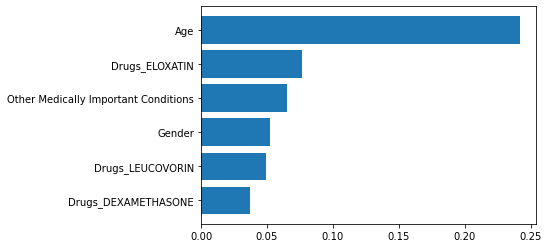

In [64]:
ar = SMOTE_SRF.feature_importances_
ind = np.argpartition(ar, -6)[-6:]
ar_1 = over_X_train.columns
top1 = ar[ind]
top = top1.tolist()
top2 = ar_1[ind]
print(top2)
plt.barh(top2, top)

In [65]:
top1

array([0.03691017, 0.04933111, 0.05234866, 0.06475668, 0.07676313,
       0.24161848])